Korrelaatiokerroin ja hajontakaavio

Määrällisten muuttujien välisiä riippuvuuksia selvitellään korrelaatiokertoimien ja hajontakaavioiden avulla

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Korrelaation merkitsevyyden testaukseen
from scipy.stats import pearsonr

In [2]:
df = pd.read_excel("https://taanila.fi/data3.xlsx")
df

,nro,toimitusnopeus,hintataso,joustavuus hinnoissa,toimittajan imago,palvelu,myyntihenkilöstön imago,tuotteiden laatu,yleinen tyytyväisyys
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,4.2
1,2,1.8,3.0,6.3,6.6,2.5,4.0,8.4,4.3
2,3,3.4,5.2,5.7,6.0,4.3,2.7,8.2,5.2
3,4,2.7,1.0,7.1,5.9,1.8,2.3,7.8,3.9
4,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,6.8
...,...,...,...,...,...,...,...,...,...
95,96,0.6,1.6,6.4,5.0,0.7,2.1,8.4,3.4
96,97,6.1,0.5,9.2,4.8,3.3,2.8,7.1,5.2
97,98,2.0,2.8,5.2,5.0,2.4,2.7,8.4,3.7
98,99,3.1,2.2,6.7,6.8,2.6,2.9,8.4,4.3


In [3]:
df = df.drop("nro", axis=1)

Korrelaatiokerroin

Tunnusluku, joka mittaa kahden muuttujan välistä riippuvuutta. Korrelaatiokerroin voi olla välillä -1 - +1. Rippuuvuus on voimakkaampaa, mitä kauempana korrelaatiokertoimen arvo on nollasta.

In [4]:
df.corr()["yleinen tyytyväisyys"]

toimitusnopeus             0.650632
hintataso                  0.028395
joustavuus hinnoissa       0.524814
toimittajan imago          0.475934
palvelu                    0.631233
myyntihenkilöstön imago    0.340909
tuotteiden laatu          -0.283340
yleinen tyytyväisyys       1.000000
Name: yleinen tyytyväisyys, dtype: float64

Yllä kaikkein voimakkain korrelaatio (0.65) on toimitusnopeuden ja yleisen tyytyväisyyden välillä. Heikoin korrelaatio on hintatason ja yleisent tyytyväisyyden välillä.

Hajontakaavio

Voi silmäräärin arvoida riippuvuuden voimakkuutta.

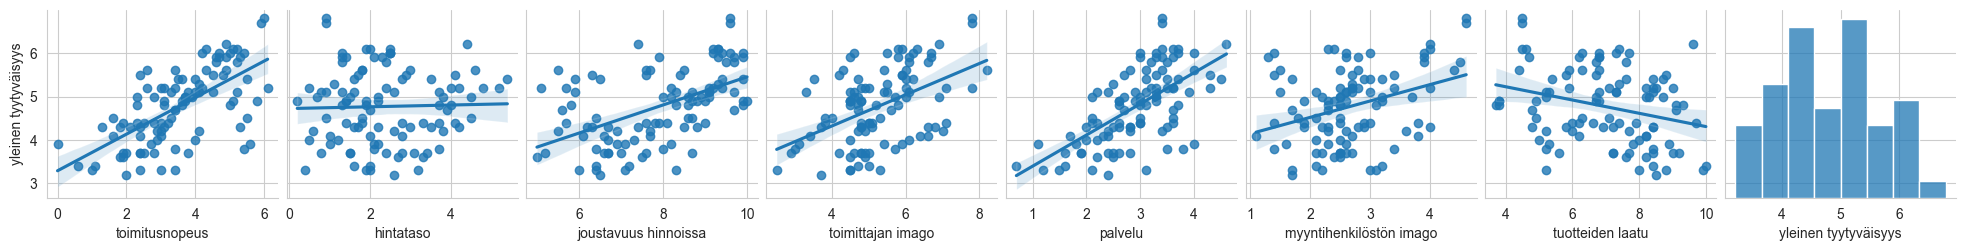

In [5]:
# Kind-parametrin arvo "reg" lisää mukaan trendiviivat
sns.pairplot(df, y_vars="yleinen tyytyväisyys", kind="reg")

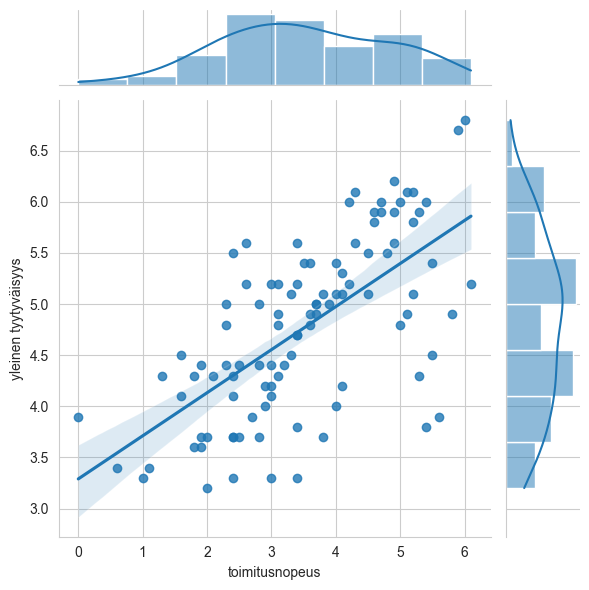

In [6]:
#Yksittäisen muuttujaparin tarkastelu hajontakaaviona
sns.jointplot(data=df, x="toimitusnopeus", y="yleinen tyytyväisyys", kind="reg")

Ovatko korrelaatiokertoimet tilastollisesti merkitseviä?

Otoksessa havaitut korrelaatiokertoimet voivat olla liian lähellä nollaa, jotta niitä voisi yleistää laajempaan perusjoukkoon, josta otos on otettu. Kyseessä voi olla otantavirheen (sattuman) aiheuttama korrelaatio.

Korrelaatiokerrointa sanotaan merkitseväksi, jos sen perusteella voidaan tehdä yleistys laajempaan perusjoukkoon, josta otos on otettu. Korrelaatiokertoimen merkitsevyyttä voit testata laskemalla niin kutsuttu p-arvo. Mitä pienempi p-arvo, sitä merkitsevämpi korrelaatio. Yleensä alle 0,05 (5 %) suuruisia p-arvoja pidetään osoituksena merkitsevästä korrelaatiosta.

Korrelaatiokertoimeen liittyvän p-arvon voit laskea siihen tarkoitetulla testillä (pearsonr).

Jos tarkasteltavissa muuttujissa on tekstimuotoisia muuttujia tai jos muuttujat sisältävät puuttuvia arvoja, niin korrelaatiokertoimeen liittyvän p-arvon laskenta ei onnistu. Poista tekstimuotoiset muuttujat ja puuttuvia arvoja sisältävät rivit ennen pearsonr-funktion käyttöä.

In [7]:
for i in df:
    df_dropna = df.dropna(subset=[i, "yleinen tyytyväisyys"])
    print(i, pearsonr(df_dropna["yleinen tyytyväisyys"], df_dropna[i]))

toimitusnopeus PearsonRResult(statistic=np.float64(0.650632330138919), pvalue=np.float64(2.3543572098033264e-13))
hintataso PearsonRResult(statistic=np.float64(0.02839466588051024), pvalue=np.float64(0.7791450989655321))
joustavuus hinnoissa PearsonRResult(statistic=np.float64(0.5248141510750396), pvalue=np.float64(2.0815396346393007e-08))
toimittajan imago PearsonRResult(statistic=np.float64(0.47593383142600115), pvalue=np.float64(5.599028749180131e-07))
palvelu PearsonRResult(statistic=np.float64(0.6312329016419479), pvalue=np.float64(1.917952074232089e-12))
myyntihenkilöstön imago PearsonRResult(statistic=np.float64(0.3409093027606838), pvalue=np.float64(0.0005188847493396843))
tuotteiden laatu PearsonRResult(statistic=np.float64(-0.2833398031845101), pvalue=np.float64(0.004282584841192027))
yleinen tyytyväisyys PearsonRResult(statistic=np.float64(0.9999999999999998), pvalue=np.float64(0.0))


In [8]:
for muuttuja in df:
    df_dropna = df.dropna(subset=[muuttuja, "yleinen tyytyväisyys"])
    r, p = pearsonr(df_dropna["yleinen tyytyväisyys"], df_dropna[muuttuja])
    print(f'{muuttuja:<25} r = {r:>6.3f}, p = {p:.3f}')

toimitusnopeus            r =  0.651, p = 0.000
hintataso                 r =  0.028, p = 0.779
joustavuus hinnoissa      r =  0.525, p = 0.000
toimittajan imago         r =  0.476, p = 0.000
palvelu                   r =  0.631, p = 0.000
myyntihenkilöstön imago   r =  0.341, p = 0.001
tuotteiden laatu          r = -0.283, p = 0.004
yleinen tyytyväisyys      r =  1.000, p = 0.000
